In [1]:
import numpy as np
import pandas as pd
raw_df = pd.read_csv('data.csv', sep=',')

In [2]:
raw_df

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6
6,Layup Shot,Layup,251,20000012,34.0443,0,0,-118.2698,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,7
7,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8
8,Jump Shot,Jump Shot,265,20000012,33.9363,-65,108,-118.3348,6,3,...,2PT Field Goal,Left Side(L),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,9
9,Running Jump Shot,Jump Shot,294,20000012,33.9193,-33,125,-118.3028,3,3,...,2PT Field Goal,Center(C),In The Paint (Non-RA),8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,10


-	Action_type + combined_shot_type(str)
-	Lat
-	Loc_x
-	Loc_y
-	Lon
-	Minutes_remaining + seconds_remaining
-	Last 5sec
-	Shot_distance
-	Season(date)
-	Opponent(str)


In [3]:
raw_df['remaining_time'] = raw_df['minutes_remaining'] * 60 + raw_df['seconds_remaining']
if type(raw_df['season'][0]) is str:
    raw_df['season'] = raw_df['season'].apply(lambda x: int(x.split('-')[0]))

    
raw_df['home'] = raw_df['matchup'].apply(lambda x: int(x.find('@')==-1))

In [4]:
submission = raw_df[pd.isnull(raw_df['shot_made_flag'])]['shot_id']

In [5]:
drops = ['shot_id', 'team_id', 'team_name', 'shot_zone_area', 'shot_zone_range', 'shot_zone_basic', \
         'matchup', 'seconds_remaining', 'minutes_remaining', \
         'shot_distance', 'game_event_id', 'game_id', 'game_date']
for drop in drops:
    raw_df = raw_df.drop(drop, 1)
    
categoric_vars = ['action_type', 'combined_shot_type', 'shot_type', 'season', 'opponent']
for var in categoric_vars:
    raw_df = pd.concat([raw_df, pd.get_dummies(raw_df[var], prefix=var)], 1)
    raw_df = raw_df.drop(var, 1)

In [6]:
raw_df

,lat,loc_x,loc_y,lon,period,playoffs,shot_made_flag,remaining_time,home,action_type_Alley Oop Dunk Shot,...,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS
0,33.9723,167,72,-118.1028,1,0,NaN,627,0,0,...,0,0,1,0,0,0,0,0,0,0
1,34.0443,-157,0,-118.4268,1,0,0.0,622,0,0,...,0,0,1,0,0,0,0,0,0,0
2,33.9093,-101,135,-118.3708,1,0,1.0,465,0,0,...,0,0,1,0,0,0,0,0,0,0
3,33.8693,138,175,-118.1318,1,0,0.0,412,0,0,...,0,0,1,0,0,0,0,0,0,0
4,34.0443,0,0,-118.2698,2,0,1.0,379,0,0,...,0,0,1,0,0,0,0,0,0,0
5,34.0553,-145,-11,-118.4148,3,0,0.0,572,0,0,...,0,0,1,0,0,0,0,0,0,0
6,34.0443,0,0,-118.2698,3,0,1.0,532,0,0,...,0,0,1,0,0,0,0,0,0,0
7,34.0163,1,28,-118.2688,3,0,NaN,485,0,0,...,0,0,1,0,0,0,0,0,0,0
8,33.9363,-65,108,-118.3348,3,0,1.0,372,0,0,...,0,0,1,0,0,0,0,0,0,0
9,33.9193,-33,125,-118.3028,3,0,0.0,216,0,0,...,0,0,1,0,0,0,0,0,0,0


In [7]:
notnull_df = raw_df[pd.notnull(raw_df['shot_made_flag'])]
null_df = raw_df[pd.isnull(raw_df['shot_made_flag'])]

train_X = notnull_df.drop('shot_made_flag', 1)
train_y = notnull_df['shot_made_flag']

test_X = null_df.drop('shot_made_flag', 1)


In [8]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

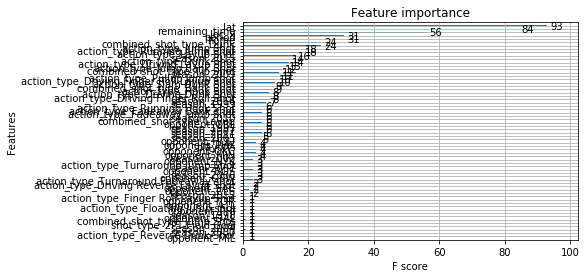

In [9]:
model = XGBClassifier()
model.fit(train_X, train_y)

plot_importance(model)
plt.show()

In [25]:
prediction = model.predict_proba(test_X)

In [26]:
prediction = prediction[:, 1]

In [27]:
result= pd.DataFrame({ 'shot_id': submission,
                            'shot_made_flag': prediction })

In [28]:
result

,shot_id,shot_made_flag
0,1,0.324224
7,8,0.316926
16,17,0.698528
19,20,0.732354
32,33,0.317671
33,34,0.374935
34,35,0.438137
35,36,0.410141
36,37,0.636979
37,38,0.349628


In [29]:
result.to_csv('output.csv', sep=',', index=False)